# Advent of Code Day 

Find the Elf carrying the most Calories. How many total Calories is that Elf carrying?

In [20]:
max_cal=0
curr=0
with open("input.txt") as f:
    lines=f.readlines()

for i in range(len(lines)):
    if lines[i].strip()!="":
        curr+=int(lines[i].strip())
    else:
        if curr>max_cal:
            max_cal=curr
        curr=0

In [24]:
print("max cal:",max_cal)

max cal: 74711


Day1, q2:
Find the top three Elves carrying the most Calories. How many Calories are those Elves carrying in total?

In [29]:
elf_cals=[]
curr=0
for i in range(len(lines)):
    if lines[i].strip()!="":
        curr+=int(lines[i].strip())
    else:
        elf_cals.append(curr)
        curr=0
sum(sorted(elf_cals)[-3:])

209481

# Day 2 q1:

Rock-Paper_scissors

What would your total score be if everything goes exactly according to your strategy guide?

In [41]:
score=0

score_dict={"A":{"X":4, "Y":8, "Z":3},
            "B":{"X":1, "Y":5, "Z":9},
            "C":{"X":7, "Y":2, "Z":6}}
with open("input2.txt") as f:
    rounds=f.readlines()

for rnd in rounds:
    rnd=rnd.strip()
    score+=score_dict[rnd[0]][rnd[-1]]

score

11873

q2: X,Y,Z actually indicate lose, draw, win, so we need to update scoring

In [42]:
score=0

score_dict={"A":{"X":3, "Y":4, "Z":8},
            "B":{"X":1, "Y":5, "Z":9},
            "C":{"X":2, "Y":6, "Z":7}}
with open("input2.txt") as f:
    rounds=f.readlines()

for rnd in rounds:
    rnd=rnd.strip()
    score+=score_dict[rnd[0]][rnd[-1]]

score

12014

# D3 q1
For example, suppose you have the following list of contents from six rucksacks:

- vJrwpWtwJgWrhcsFMMfFFhFp
- jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL
- PmmdzqPrVvPwwTWBwg
- wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn
- ttgJtRGJQctTZtZT
- CrZsJsPPZsGzwwsLwLmpwMDw

The first rucksack contains the items vJrwpWtwJgWrhcsFMMfFFhFp, which means its first compartment contains the items vJrwpWtwJgWr, while the second compartment contains the items hcsFMMfFFhFp. The only item type that appears in both compartments is lowercase p.
The second rucksack's compartments contain jqHRNqRjqzjGDLGL and rsFMfFZSrLrFZsSL. The only item type that appears in both compartments is uppercase L.
The third rucksack's compartments contain PmmdzqPrV and vPwwTWBwg; the only common item type is uppercase P.
The fourth rucksack's compartments only share item type v.
The fifth rucksack's compartments only share item type t.
The sixth rucksack's compartments only share item type s.
To help prioritize item rearrangement, every item type can be converted to a priority:

Lowercase item types a through z have priorities 1 through 26.
Uppercase item types A through Z have priorities 27 through 52.
In the above example, the priority of the item type that appears in both compartments of each rucksack is 16 (p), 38 (L), 42 (P), 22 (v), 20 (t), and 19 (s); the sum of these is 157.

Find the item type that appears in both compartments of each rucksack. What is the sum of the priorities of those item types?

In [49]:
import string

In [51]:

priorities={j:i+1 for i,j in enumerate(string.ascii_letters)}

with open("rucksack.txt") as f:
    items=f.readlines()


In [58]:
prio_sum=0
for line in items:
    cut=len(line)//2
    res=set(line[:cut]).intersection(set(line[cut:]))
    prio_sum+=priorities[res.pop()]
prio_sum

8252

In [59]:
groups=[items[i:i+3] for i in range(0, len(items), 3)]

In [62]:
group_sum=0
for group in groups:
    res=set(group[0].strip()).intersection(set(group[1].strip())).intersection(set(group[2].strip()))
    group_sum+=priorities[res.pop()]
                                    
group_sum

2828

# Day4 q1
One group fully contains the other

In how many assignment pairs does one range fully contain the other?



In [65]:
import regex as re
with open("contained.txt") as f:
    contained=f.readlines()
contained[:5]

['28-47,45-47\n',
 '32-97,98-98\n',
 '59-92,91-93\n',
 '8-74,9-74\n',
 '58-98,23-57\n']

In [105]:
n=len(contained)
lmin=[int(re.findall(r"^(\d+)-",contained[i]).pop()) for i in range(n)]
lmax=[int(re.findall(r"-(\d+),",contained[i]).pop()) for i in range(n)]
rmin=[int(re.findall(r",(\d+)-",contained[i]).pop()) for i in range(n)]
rmax=[int(re.findall(r"-(\d+)\n",contained[i]).pop()) for i in range(n)]


In [106]:
contains_sum=0
for i in range(len(contained)):

    if lmin[i]>=rmin[i] and lmax[i]<=rmax[i]:
        contains_sum+=1
    #b contains a
    elif rmin[i]>=lmin[i] and rmax[i]<=lmax[i]:
        contains_sum+=1
contains_sum

524

In how many assignment pairs do the ranges overlap?



In [114]:
overlaps=0
for i in range(len(contained)):
    if lmin[i] in range(rmin[i], rmax[i]+1) or lmax[i] in range(rmin[i], rmax[i]+1):
        overlaps+=1
    elif rmin[i] in range(lmin[i], lmax[i]+1) or rmax[i] in range(lmin[i], lmax[i]+1):
        overlaps+=1
overlaps

798

In [113]:
5 in range(2,6+1)

True

# Day 5q1

moving crates

In [134]:
test={2:['b','c','d','e','f'],
      4:['t','w','g'],
      3:['e','g','h','r']}

test[2].pop(1)


['b', 'd', 'e', 'f']

In [159]:
with open("crates.txt") as f:
    crates=f.readlines()
stacks={1:['B','V','S','N','T','C','H','Q'],
        2:['W','D','B','G'],
        3:['F','W','R','T','S','Q','B'],
        4:['L','G','W','S','Z','J','D','N'],
        5:['M','P','D','V','F'],
        6:['F','W','J'],
        7:['L','N','Q','B','J','V'],
        8:['G','T','R','C','J','Q','S','N'],
        9:['J','S','Q','C','W','D','M']}
moves=crates[10:]
moves[0]

'move 3 from 6 to 2\n'

In [160]:
for move in moves:
    #extract instructions
    n=int(re.findall(r"move\s(\d+)", move).pop())
    source=int(re.findall(r"from\s(\d+)", move).pop())
    destination=int(re.findall(r"to\s(\d+)", move).pop())
    #execute moves
    load=stacks[source][-n:]
    stacks[destination]+=load
    stacks[source]=stacks[source][:-n]


In [162]:
ans=[stacks[i][-1] for i in range(1,10)]
"".join(ans)

'CJVLJQPHS'

# Day6 q1

signal processing: the start of a packet is indicated by a sequence of four characters that are all different

How many characters need to be processed before the first start-of-packet marker is detected?

In [166]:
with open("datastream.txt") as f:
    data=f.readlines()
signal=data[0]

In [182]:
#slide a window of length 4 through the signal
#if the characters in the window are unique, they are the
#start-of-packet marker; answer is next index after end of marker
#start-of-message, 14 distinct
j=14
while j<len(signal):
    window=signal[j-14:j]
    if len(set(window))==14:
        print(j)
        break
    j+=1

3513


# Day 7

file directory system

Find all of the directories with a total size of at most 100000. What is the sum of the total sizes of those directories?

In [185]:
with open("directories.txt") as f:
    directories=f.readlines()
directories[:10]

['$ cd /\n',
 '$ ls\n',
 'dir bgmjrlz\n',
 'dir bhp\n',
 'dir cbcwz\n',
 '169838 fddw.bgw\n',
 'dir fvhmzqc\n',
 'dir hqmlnpn\n',
 '248637 jtwpn.lnr\n',
 '319470 lnmrrht.zbn\n']

In [197]:
dir_names=[dr[4:-1] for dr in directories if "dir" in dr]

***Requires a lot of thought. Maybe come back to it***

(more fun- tree heights)
#D7 q1

How many trees are visible from the map

In [200]:
import numpy as np

In [213]:
with open("treeheights.txt") as f:
    heights=f.readlines()
treemap=np.array([[int(x) for x in heights[i].strip()] for i in range(len(heights))])

In [217]:
treemap[3,0:2]

array([[3, 2, 3, ..., 1, 0, 0],
       [3, 3, 1, ..., 0, 1, 2],
       [0, 2, 3, ..., 2, 3, 2],
       ...,
       [1, 1, 0, ..., 1, 2, 3],
       [0, 0, 1, ..., 2, 0, 3],
       [1, 1, 0, ..., 2, 2, 1]])

In [224]:
exterior_visible=sum(2*treemap.shape)-4

0

In [235]:
#interior visible trees
interior_visible_count=0
for i in range(1, treemap.shape[0]-1):
    for j in range(1, treemap.shape[1]-1):
        tree=treemap[i,j]
        #look west
        west=tree > np.max(treemap[i, :j])
            
        #look east
        east=tree > np.max(treemap[i, j+1:])
        
        #look north
        north=tree > np.max(treemap[:i, j])
        
        #look south
        south = tree > np.max(treemap[i+1:, j])
        
        #if tree visible from any direction, increment count
        if west or east or north or south:
            interior_visible_count+=1
interior_visible_count

1303

In [236]:
interior_visible_count+exterior_visible

1695

In [237]:
scenic_score=np.zeros_like(treemap)

In [250]:
#calculate scenic score for each tree on the map
#product of length of arrays in each direction to a tree of greater or equal size or edge
#trees on edge have scenic score of 0
for i in range(1, treemap.shape[0]-1):
    for j in range(1, treemap.shape[1]-1):
        tree=treemap[i,j]
        #look west
        west=treemap[i, :j]
        west_score=0
        for k in range(len(west)):
            if west[-k]>=tree:
                west_score+=1
                break
            west_score+=1
        #look east
        east=treemap[i, j+1:]
        east_score=0
        for k in range(0,len(east)):
            if east[k]>=tree:
                east_score+=1
                break
            east_score+=1
        #look north
        north=treemap[:i, j]
        north_score=0
        for k in range(len(north)):
            if north[-k]>=tree:
                north_score+=1
                break
            north_score+=1
        
        #look south
        south = treemap[i+1:, j]
        south_score=0
        for k in range(0,len(south)):
            if south[k]>=tree:
                south_score+=1
                break
            south_score+=1
        #calculate scenic score and append to scenic score
        scenic_score[i,j]=north_score*south_score*east_score*west_score

In [254]:
np.max(scenic_score)

287040

Day 9 Rope Bridge

How many positions does the tail of the rope visit at least once?

Tail must always be touching head.

In [258]:
with open("rope.txt") as f:
    rope=f.readlines()
rope[:5]

['D 2\n', 'R 1\n', 'U 1\n', 'L 1\n', 'D 2\n']

In [389]:
#strategy: put knots in center of 1000x1000 field and move around
#keep track of spaces visited by tail.
visited=np.zeros([1000,1000])

#function to determine if Head and Tail are touching
def not_touching(hx, hy, tx, ty):
    if (abs(hx-tx)>1) or (abs(hy-ty)>1):
        return True
    return False
    
def head_move(direction, hx, hy):
    #function to move Head and Tail single move 
    #takes direction and current position of Head and Tail
    #returns updated position of Head and Tail
    
    #first move Head
    #move up
    if direction=="U":
        hy-=1
    if direction=="D":
        hy+=1
    if direction=="L":
        hx-=1
    if direction=="R":
        hx+=1
    return (hx, hy)
    
def tail_move(hx, hy, tx, ty):
    #horizontal move
    if hy==ty:
        #head is to the right
        if hx>tx:
            tx+=1
        #head is to the left
        elif hx<tx:
            tx-=1
    #vertical move
    if hx==tx:
        #head is up
        if hy<ty:
            ty-=1
        #head is down
        elif hy>ty:
            ty+=1
    #diagonal moves
    if hx!=tx and hy!=ty:
        if hx>tx:
            tx+=1
        else:
            tx-=1
        if hy>ty:
            ty+=1
        else:
            ty-=1
    return (tx, ty)

In [390]:
#upgrade to 10 knots
#initialize head and tail positions to middle of board
knots={i:[500,500] for i in range(10)}

In [391]:
visited[500,500]=1
for cmd in rope:
    #extract instruction
    direction=cmd[0]
    num=int(re.findall("\s(\d+)",cmd).pop())
    #execute commands
    for i in range(num):
        knots[0][0], knots[0][1] = head_move(direction, knots[0][0], knots[0][1])
        #now it's a chain reaction
        for j in range(1,10):
            if not_touching(knots[j-1][0], knots[j-1][1], knots[j][0], knots[j][1]):
                knots[j][0], knots[j][1]=tail_move(knots[j-1][0], knots[j-1][1], knots[j][0], knots[j][1])
        visited[knots[9][0], knots[9][1]]=1
    

In [392]:
sum(sum(visited))

2405.0

In [372]:
sum(sum(visited)) #right answer- BOOM!

2406.0

In [303]:
#how far did the Head and Tail travel?
non_zero_rows=[i for i in range(visited.shape[0]) if np.sum(visited[i])>0]
non_zero_cols=[i for i in range(visited.shape[1]) if np.sum(visited[:,i])>0]

<AxesSubplot:>

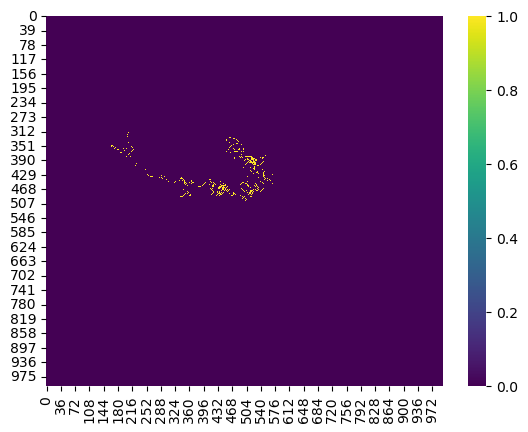

In [393]:
import pandas as pd
import seaborn as sns
sns.heatmap(pd.DataFrame(visited), cmap='viridis')

In [396]:
re.findall(r"(-?\d+)", "2, -3, 10, 12, -130, 55")

['2', '-3', '10', '12', '-130', '55']

# D10 q1

Signal Strength: the cycle number multiplied by the value of the X register

Find the signal strength during the 20th, 60th, 100th, 140th, 180th, and 220th cycles. What is the sum of these six signal strengths?

In [441]:
with open("signal.txt") as f:
    signal=f.readlines()
signal[:5]

['addx 1\n', 'addx 5\n', 'noop\n', 'addx -1\n', 'noop\n']

In [419]:
[re.findall(r"(-?\d+)",signal[i]) for i in range(5)][0].pop()

'1'

In [442]:
#initialize register
X=1
cycles=[]
for sig in signal:
    if sig[:4]=='noop':
        cycles.append(X)
    elif sig[:4]=='addx':
        num=int(re.findall(r"(-?\d+)",sig).pop())
        for i in range(2):
            if i==1:
                X+=num
            cycles.append(X)
            

In [444]:
sel_cycles=np.array([20, 60, 100, 140, 180, 220])

print(np.array(cycles)[sel_cycles-2])
print(np.array(cycles)[sel_cycles-2]*sel_cycles)
print(sum(np.array(cycles)[sel_cycles-2]*sel_cycles))

[17 17 23 22 21 16]
[ 340 1020 2300 3080 3780 3520]
14040


In [500]:
#X indicates sprite position
disp=[]
for g in range(0,240,40):
    row=cycles[g: g+40] 
    tmp=[]
    for p in range(40):
        if p in range(row[p]-2, row[p]+1) :
            tmp.append("#")
        else:
            tmp.append(".")
    disp.append(tmp)

In [501]:
["".join(disp[i]) for i in range(6)] ZGCJZJFL

['###..##...##....##.####...##.####.#.....',
 '..#.#..#.#..#....#....#....#.#....#.....',
 '.#..#....#.......#...#.....#.###..#.....',
 '#...#.##.#.......#..#......#.#....#.....',
 '....#..#.#..#.#..#.#....#..#.#....#.....',
 '###..###..##...##..####..##..#....####..']

In [513]:
z=np.arange(-2,2,np.pi/4)

np.arcsinh(z)

array([-1.44363548, -1.02528754, -0.41701183,  0.34906261,  0.97803793,
        1.41049977])

In [514]:
#(arcsinh equiv to hyp inv sin)
np.log(np.sqrt(z**2+1)+z)

#ihs = function(z){return(log(sqrt(z^2+1)+z))}

array([-1.44363548, -1.02528754, -0.41701183,  0.34906261,  0.97803793,
        1.41049977])

# D25, q1 SNAFU Numbers

In [516]:
with open("snafunums.txt") as f:
    nums=f.readlines()
nums[:5]

['1=120=22222-=10-=\n',
 '1--22-=-\n',
 '21\n',
 '1=0222=-1=-0--220=02\n',
 '122102\n']

In [529]:
snafu_to_dec={"1":1,"2":2,"0":0,"-":-1,"=":-2}
decsum=0
for num in nums:
    snafu=[*num.strip()]
    for i in range(len(snafu)):
        decsum+=snafu_to_dec[snafu[-(i+1)]]*5**i
decsum

28115957264952

In [548]:
dec_input=decsum
place=0
fives={}
while dec_input>0:
    placeval=dec_input%5**place
    fives[place]=placeval
    dec_input-=placeval
    place+=1

In [549]:
fives

{0: 0,
 1: 2,
 2: 0,
 3: 75,
 4: 500,
 5: 1875,
 6: 12500,
 7: 62500,
 8: 156250,
 9: 0,
 10: 0,
 11: 39062500,
 12: 195312500,
 13: 488281250,
 14: 2441406250,
 15: 6103515625,
 16: 30517578125,
 17: 610351562500,
 18: 762939453125,
 19: 7629394531250,
 20: 19073486328125}

In [537]:
def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]

b5=numberToBase(decsum, 5)

In [547]:
b5sum=0
for i in range(len(b5)):
    b5sum+=b5[-(i+1)]*5**i
b5

[1, 2, 1, 4, 1, 1, 2, 2, 4, 4, 0, 0, 2, 4, 4, 3, 4, 3, 0, 2]

In [552]:
ans="122-12==0-01=00-0=02"
ansum=0
snafu=[*ans.strip()]
for i in range(len(snafu)):
    ansum+=snafu_to_dec[snafu[-(i+1)]]*5**i
ansum==decsum

True